<a id="toc"></a>
# barc4sr: 
## Example 02 - Power density spatial distribution for an ideal and a tabulated undulator

[rafael.celestre@synchrotron-soleil.fr](mailto:rafael.celestre@synchrotron-soleil.fr)

<hr style="border:1px solid orange">

In [1]:
__author__ = ['Rafael Celestre']
__contact__ = 'rafael.celestre@synchrotron-soleil.fr'
__license__ = 'GPL-3.0'
__copyright__ = 'Synchrotron SOLEIL, Saint Aubin, France'
__created__ = '25/MAR/2024'
__changed__ = '17/JUN/2024'


import sys

import barc4sr.sr_undulator as und
import numpy as np
from barc4plots.barc4plots import PlotManager
from barc4sr.aux_processing import read_power_density
from barc4sr.aux_utils import (
                            ElectronBeam,
                            MagneticStructure,
                            SynchrotronSource,
                            read_electron_trajectory,
                            write_magnetic_field,
)

# checking we are using the correct python:
print(sys.executable)
print(sys.version)

# # benchmarking tools
%load_ext autoreload
%autoreload 2
# %matplotlib widget


c:\Users\celestre\AppData\Local\miniconda3\envs\oasys\python.exe
3.8.18 (default, Sep 11 2023, 13:39:12) [MSC v.1916 64 bit (AMD64)]


### Creation of SYNED input file (.json)

[Back to the top](#toc)

The SYNED Light Source file containing the electron beam parameters and the undulator parameters
is necessary for using barc4sr. While the preferred method for generating it remains [OASYS](https://oasys-kit.github.io/), 
barc4sr provides its own functions methods.


In [2]:
straight_section = ElectronBeam()

straight_section.from_twiss(energy=2.75, energy_spread=0.001025, current=0.500,
                            emittance=3.939e-9, coupling=1/100,
                            emittance_x=None, emittance_y=None,
                            beta_x=4.789, beta_y=3.7497, 
                            alpha_x=-0.3858, alpha_y=-0.7746,
                            eta_x=0.1804, eta_y=0.0044,
                            etap_x=0.0007, etap_y=-0.0025)

u64 = MagneticStructure(K_vertical=0.0,
                        K_horizontal=0.0,
                        period_length=64e-3,
                        number_of_periods=28.0)

u64.set_resonant_energy(50, 1, straight_section.energy_in_GeV, "v")

hermes = SynchrotronSource(straight_section, u64)
hermes.write_syned_config(".\light_sources\soleil_hu64.json", "SOLEIL-HU64")

## Ideal undulator

### Calculation of the **power density spatial distribution** of an ideal planar undulator

This example show different ways or calling ```xoppy.undulator_power_density(*args, **kwargs)```:

[Back to the top](#toc)

In [3]:
hor_slit=50e-3
hor_slit_n=int(hor_slit/50e-6)
ver_slit=15e-3
ver_slit_n=int(ver_slit/50e-6)

- **ideal undulator power density** at a 50 $\times$ 15mm² slit 20m downstream the centre of the straight section

In [4]:
power_density = und.power_density(file_name=".\_results\SOLEIL-U64mm",
                                  json_file=".\light_sources\soleil_hu64.json",
                                  hor_slit=hor_slit, 
                                  hor_slit_n=hor_slit_n,
                                  ver_slit=ver_slit,
                                  ver_slit_n=ver_slit_n,
                                  observation_point=20,
                                  Kv_symmetry=-1)


Undulator power density spatial distribution using SRW. Please wait...
> Generating the electron beam ... completed
> Generating the magnetic structure ... completed
> Electron trajectory calculation ... completed
> Undulator power density spatial distribution using SRW ... completed
Undulator power density spatial distribution using SRW: finished
>> Total elapsed time: 28.37 s


Total received power: 5105.848 W
Peak power density: 24.363 W/mm^2


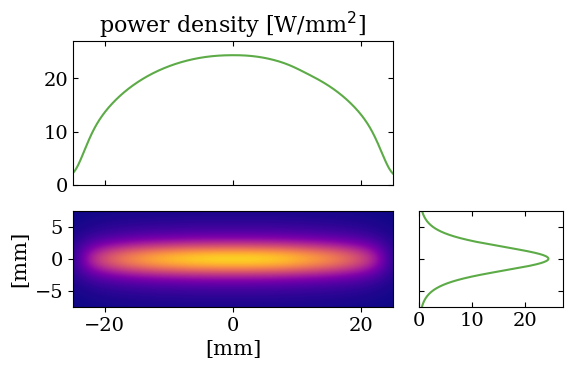

In [5]:
power_ideal = read_power_density(".\_results\SOLEIL-U64mm_power_density.h5")

img = PlotManager(power_ideal["power_density"]["map"], power_ideal["axis"]["x"], power_ideal["axis"]["y"])
img.additional_info('power density [W/mm$^2$]', '[mm]', '[mm]', min=0, max=27)
img.aesthetics(400, True, True, 0 , 1, False, 4).info_2d_plot(9, True, None).plot_2d_cuts()


- **tabulated undulator power density** at a 5x5mm² slit 20m downstream the centre of the straight section

In [6]:
power_density = und.power_density(file_name=".\_results\SOLEIL-tabU64mm",
                                  json_file=".\light_sources\soleil_hu64.json",
                                  hor_slit=hor_slit, 
                                  hor_slit_n=hor_slit_n,
                                  ver_slit=ver_slit,
                                  ver_slit_n=ver_slit_n,
                                  observation_point=20,
                                  Kv_symmetry=-1,
                                  magnetic_measurement=r".\light_sources\tabulated_hu64.dat")


Undulator power density spatial distribution using SRW. Please wait...
> Generating the electron beam ... completed
> Generating the magnetic structure ...  tabulated magnetic field ... completed
> Electron trajectory calculation ... completed
> Undulator power density spatial distribution using SRW ... completed
Undulator power density spatial distribution using SRW: finished
>> Total elapsed time: 27.72 s


Total received power: 5108.572 W
Peak power density: 24.410 W/mm^2


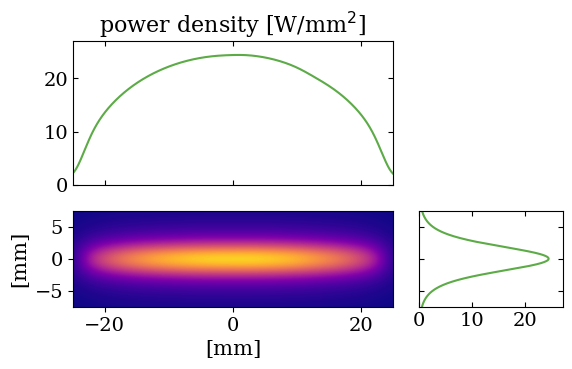

In [7]:
power_tabulated = read_power_density(".\_results\SOLEIL-tabU64mm_power_density.h5")

img = PlotManager(power_tabulated["power_density"]["map"], power_ideal["axis"]["x"], power_ideal["axis"]["y"])
img.additional_info('power density [W/mm$^2$]', '[mm]', '[mm]', min=0, max=27)
img.aesthetics(400, True, True, 0 , 1, False, 4).info_2d_plot(9, True, None).plot_2d_cuts()


- comparison

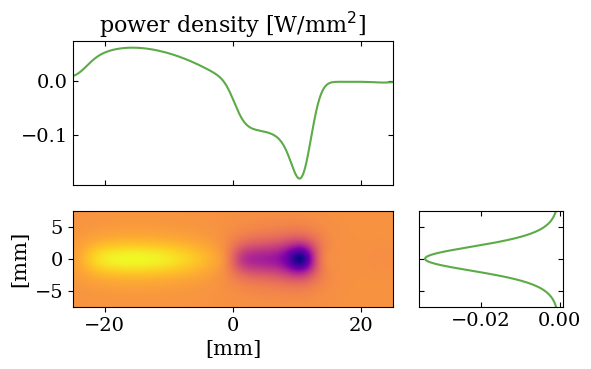

In [8]:
img = PlotManager(power_ideal["power_density"]["map"]-power_tabulated["power_density"]["map"], power_ideal["axis"]["x"], power_ideal["axis"]["y"])
img.additional_info('power density [W/mm$^2$]', '[mm]', '[mm]')#, min=0, max=14)
img.aesthetics(400, True, True, 0 , 1, False, 4).info_2d_plot(9, True, None).plot_2d_cuts()